In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import ml_utils.save_io as io
import numpy as np
import os
import seaborn as sns

pd.set_option('display.max_rows', 500)

In [32]:
df = pd.read_csv("../training_scripts/objrecogRNN/systematicity_manifest.csv", sep="!")
df

,absoluteCoords,egoCentered,model_class,model_name,model_type,obj_recog,randomizeObjs,restrictCamera,seed,smoothMovement,specGoalObjs,validation_color_acc,validation_loss,validation_obj_acc,validation_rew,validation_shape_acc
0,0,1,RNNLocator,objrecogRNN/objrecogRNN_0_seed0_egoCentered1_a...,EgoRelative,True,0,0,0,0,0,0.720000,0.107928,0.390769,-0.227834,0.061538
1,0,1,RNNLocator,objrecogRNN/objrecogRNN_1_seed1_egoCentered1_a...,EgoRelative,True,0,0,1,0,0,0.680000,0.059820,0.364615,-0.119641,0.049231
2,1,0,RNNLocator,objrecogRNN/objrecogRNN_2_seed0_egoCentered0_a...,AlloAbsolute,True,0,0,0,0,0,0.735385,0.048225,0.398462,-0.096450,0.061538


In [33]:
df['seed'] = df.apply(lambda x: int(x.model_name.split("seed")[-1].split("_")[0]), axis=1)

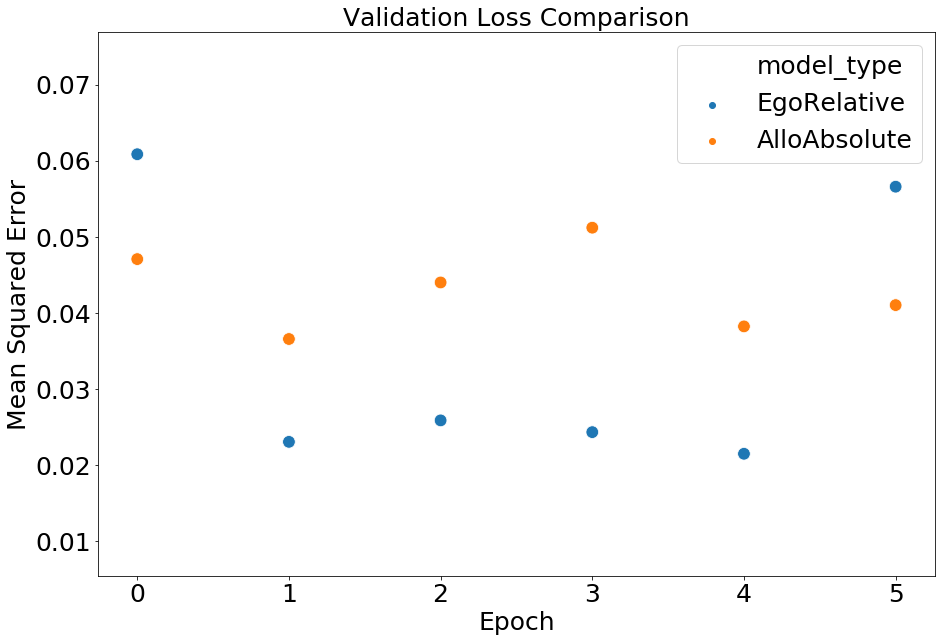

In [30]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x="seed", y="validation_loss", hue="model_type", data=df, s=160)
plt.title("Validation Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]),
 <a list of 7 Text yticklabel objects>)

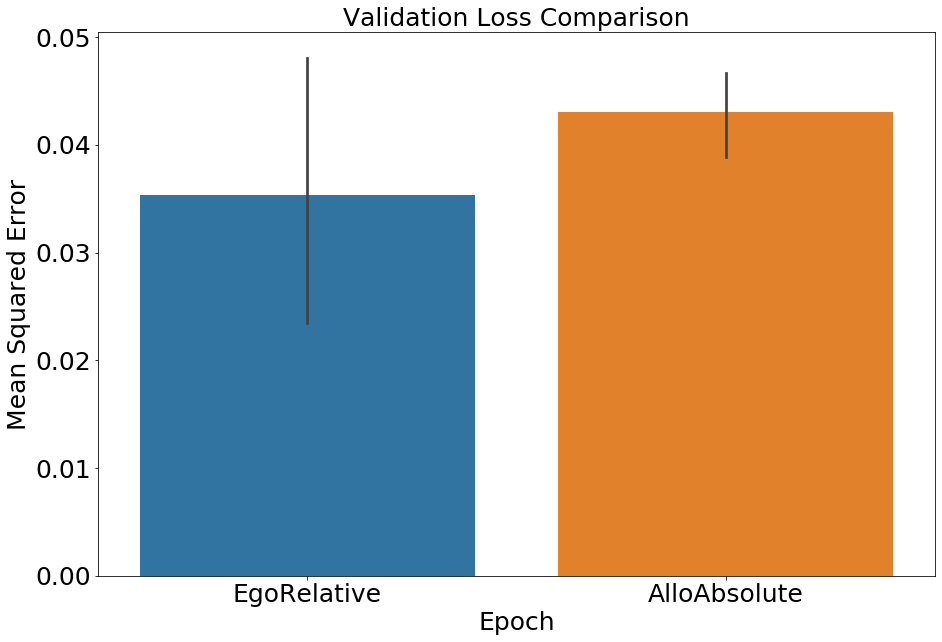

In [31]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x="model_type", y="validation_loss", data=df)
# plt.ylim([0,.75])
# plt.xlim([-1,125])
plt.title("Validation Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

In [44]:
filt_df = df.loc[df['seed']==0]
filt_df = pd.melt(filt_df, ["model_type"], ["validation_obj_acc", "validation_color_acc", "validation_shape_acc"], "Accuracy Type", "Accuracy")

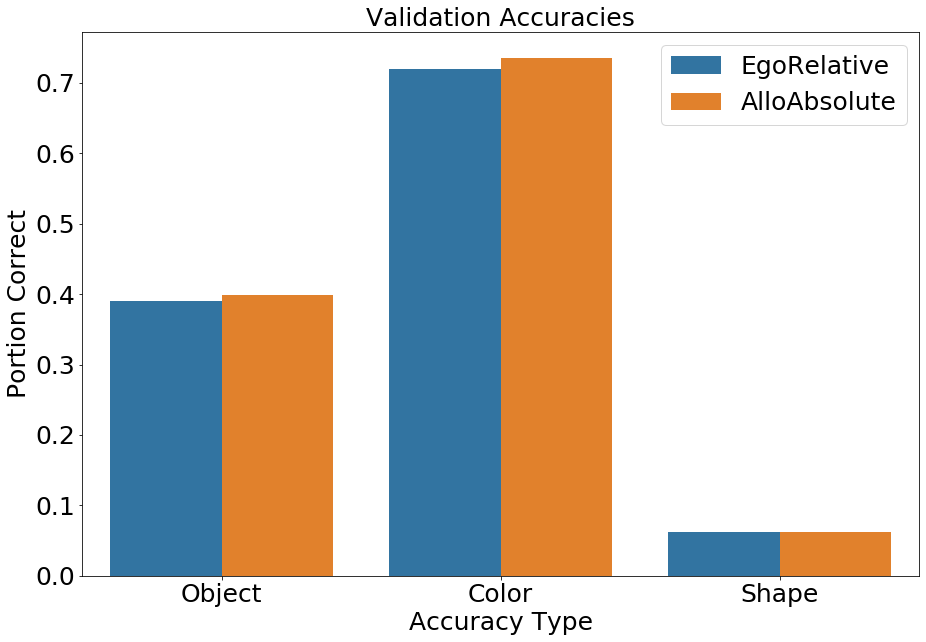

In [53]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x="Accuracy Type", y="Accuracy", hue="model_type", data=filt_df)
# plt.ylim([0,.75])
# plt.xlim([-1,125])
plt.title("Validation Accuracies",fontsize=25)
plt.ylabel("Portion Correct",fontsize=25)
plt.xlabel("Accuracy Type", fontsize=25)
ax = plt.gca()
ax.set_xticklabels(["Object", "Color", "Shape"])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)